In [136]:
import pandas as pd
import seaborn as sns
from ggplot import *
import numpy as np
%matplotlib inline
import sklearn.cluster as cluster
import coin.segmentation as seg
import coin.analysis as an
import math
from sklearn.externals.six import StringIO  
import pydot 

In [93]:
balice=pd.read_csv("windbalice.csv")
aleje=pd.read_csv("dane-pomiarowe_2015-12.csv",sep=";")

In [94]:
aleje.columns=['day','no2','nox','no','co','co8','benz','pm10','pm2.5']

In [95]:
aleje[:1]

,day,no2,nox,no,co,co8,benz,pm10,pm2.5
0,1.12,42,107,42,408,769,-,21,14


In [96]:
def convday(orig):
    elements=str(orig).split(".")
    if len(elements)>1:
        day, month = elements
        if (len(day))<2:
            day="0"+day
        return "2015-"+month+"-"+day
    return "none"
aleje.day=map(lambda d: convday(d),aleje.day)

In [97]:
aleje[:3]

,day,no2,nox,no,co,co8,benz,pm10,pm2.5
0,2015-12-01,42,107,42,408,769,-,21,14
1,2015-12-02,63,241,117,832,1295,-,52,40
2,2015-12-03,73,395,211,1368,2112,-,126,86


In [98]:
balice[:3]

,day,max temp,min temp,avg temp,td avg,hr avg,wind dir,wind int,wind gust,pressure,precip,tot oct,low oct,visibility
0,2015-12-02,8.9,3.4,5.1,1.0,75.7,W,25.1,72.0,1020.5,0.1,6.8,6.7,31.2
1,2015-12-03,8.7,2.9,5.7,5.0,94.8,WSW,11.9,----,1027.7,1.0,8.0,7.6,5.8
2,2015-12-04,8.3,-2.7,3.4,2.4,94.7,SW,6.3,----,1032.2,0.0,4.4,4.9,3.1


In [119]:
switchbalice=balice.copy()
switchaleje=aleje.copy()

In [114]:
def nextday(orig):
    year, month, day = orig.split("-")
    nextday = str(int(day)+1)
    if len(nextday)<2:
        nextday="0"+nextday
    return year+"-"+month+"-"+nextday

In [120]:
switchbalice['day']=map(lambda d: nextday(d), balice.day)
switchaleje['day']=map(lambda d: nextday(d), switchaleje.day)

In [103]:
balice[:2]

,day,max temp,min temp,avg temp,td avg,hr avg,wind dir,wind int,wind gust,pressure,precip,tot oct,low oct,visibility
0,2015-12-02,8.9,3.4,5.1,1,75.7,W,25.1,72.0,1020.5,0.1,6.8,6.7,31.2
1,2015-12-03,8.7,2.9,5.7,5,94.8,WSW,11.9,----,1027.7,1.0,8.0,7.6,5.8


In [104]:
switchbalice[:2]

,day,max temp,min temp,avg temp,td avg,hr avg,wind dir,wind int,wind gust,pressure,precip,tot oct,low oct,visibility
0,2015-12-03,8.9,3.4,5.1,1,75.7,W,25.1,72.0,1020.5,0.1,6.8,6.7,31.2
1,2015-12-04,8.7,2.9,5.7,5,94.8,WSW,11.9,----,1027.7,1.0,8.0,7.6,5.8


In [105]:
df=aleje.merge(balice)
dfswitch=aleje.merge(switchbalice)

In [122]:
switchaleje.columns=map(lambda c: "next "+c, switchaleje.columns)

In [123]:
switchaleje[:2]

,next day,next no2,next nox,next no,next co,next co8,next benz,next pm10,next pm2.5
0,2015-12-02,42,107,42,408,769,-,21,14
1,2015-12-03,63,241,117,832,1295,-,52,40


In [124]:
switchaleje.rename(columns={'next day':'day'}, inplace=True)
switchaleje[:2]

,day,next no2,next nox,next no,next co,next co8,next benz,next pm10,next pm2.5
0,2015-12-02,42,107,42,408,769,-,21,14
1,2015-12-03,63,241,117,832,1295,-,52,40


In [142]:
dfnextaleje=aleje.merge(switchaleje)

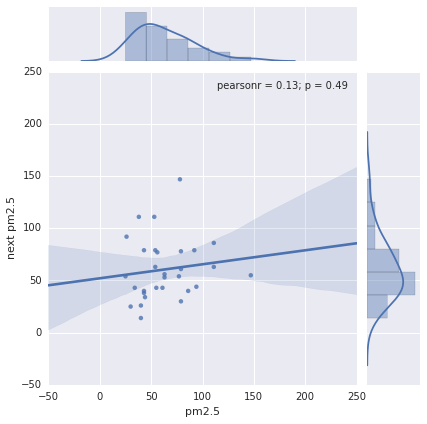

In [146]:
sns.jointplot("pm2.5", "next pm2.5", dfnextaleje, kind="reg")

In [150]:
dfnextaleje[:5]

,day,no2,nox,no,co,co8,benz,pm10,pm2.5,next no2,next nox,next no,next co,next co8,next benz,next pm10,next pm2.5
0,2015-12-02,63,241,117,832,1295,-,52,40,42,107,42,408,769,-,21,14
1,2015-12-03,73,395,211,1368,2112,-,126,86,63,241,117,832,1295,-,52,40
2,2015-12-04,71,415,225,1784,2385,-,172,111,73,395,211,1368,2112,-,126,86
3,2015-12-05,54,210,102,915,1280,-,74,53,71,415,225,1784,2385,-,172,111
4,2015-12-06,60,238,117,1142,1341,-,84,63,54,210,102,915,1280,-,74,53


In [151]:
len(dfnextaleje)

30

In [106]:
dfswitch[:2]

,day,no2,nox,no,co,co8,benz,pm10,pm2.5,max temp,...,td avg,hr avg,wind dir,wind int,wind gust,pressure,precip,tot oct,low oct,visibility
0,2015-12-03,73,395,211,1368,2112,-,126,86,8.9,...,1,75.7,W,25.1,72.0,1020.5,0.1,6.8,6.7,31.2
1,2015-12-04,71,415,225,1784,2385,-,172,111,8.7,...,5,94.8,WSW,11.9,----,1027.7,1.0,8.0,7.6,5.8


In [59]:
df

,day,no2,nox,no,co,co8,benz,pm10,pm2.5,max temp,...,td avg,hr avg,wind dir,wind int,wind gust,pressure,precip,tot oct,low oct,visibility
0,2015-12-02,63,241,117,832,1295,-,52,40,8.9,...,1.0,75.7,W,25.1,72.0,1020.5,0.1,6.8,6.7,31.2
1,2015-12-03,73,395,211,1368,2112,-,126,86,8.7,...,5.0,94.8,WSW,11.9,----,1027.7,1.0,8.0,7.6,5.8
2,2015-12-04,71,415,225,1784,2385,-,172,111,8.3,...,2.4,94.7,SW,6.3,----,1032.2,0.0,4.4,4.9,3.1
3,2015-12-05,54,210,102,915,1280,-,74,53,8.5,...,2.8,82.6,WSW,14.0,----,1031.2,Tr,6.8,3.8,11.8
4,2015-12-06,60,238,117,1142,1341,-,84,63,9.6,...,2.4,85.1,SW,13.2,----,1031.0,0.0,3.9,0.4,12.0
5,2015-12-07,65,299,153,1127,1369,-,79,54,9.9,...,2.1,85.8,SW,12.2,----,1030.1,0.0,3.2,1.0,15.4
6,2015-12-08,56,310,166,1166,1360,-,113,77,8.5,...,5.0,90.2,SW,8.9,----,1036.4,0.0,7.6,6.8,9.5
7,2015-12-09,47,237,124,982,1341,-,82,56,9.3,...,5.3,96.2,NE,9.9,----,1035.1,0.0,7.6,6.2,2.6
8,2015-12-10,78,374,194,1235,2325,-,103,63,6.0,...,3.6,94.7,WSW,10.5,----,1033.8,0.2,---,7.2,8.3
9,2015-12-11,71,382,202,1695,2465,-,153,111,7.1,...,-1.3,86.8,WNW,4.8,----,1035.4,0.0,2.5,5.4,13.0


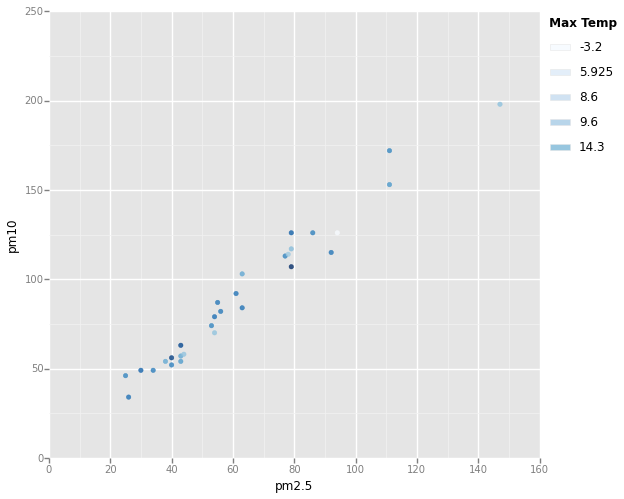

<ggplot: (278739125)>

In [65]:
ggplot(aes(x='pm2.5',y='pm10',color='max temp'),data=df)+geom_point(alpha=0.8)

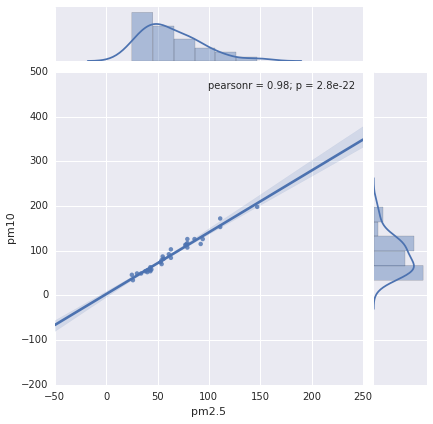

In [79]:
sns.jointplot("pm2.5", "pm10", df, kind="reg")

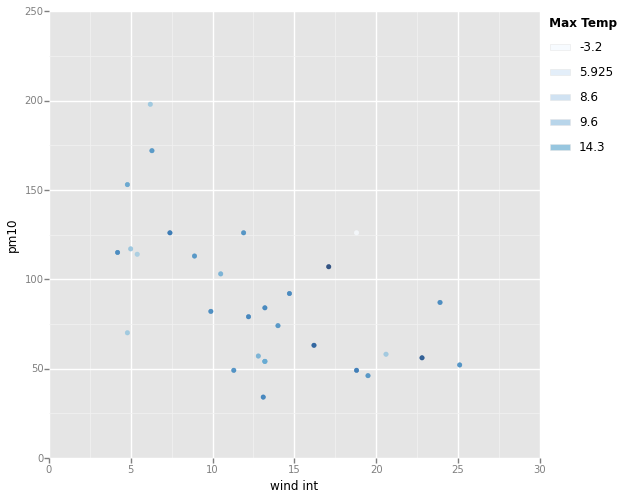

<ggplot: (279065009)>

In [66]:
ggplot(aes(x='wind int',y='pm10',color='max temp'),data=df)+geom_point(alpha=0.8)

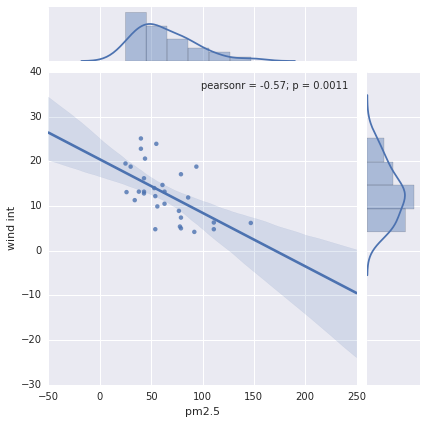

In [80]:
sns.jointplot("pm2.5", "wind int", df, kind="reg")

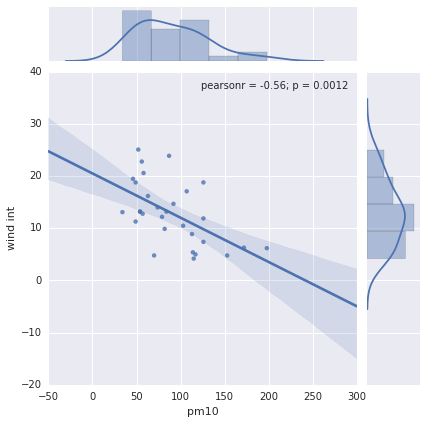

In [137]:
sns.jointplot("pm10", "wind int", df, kind="reg")

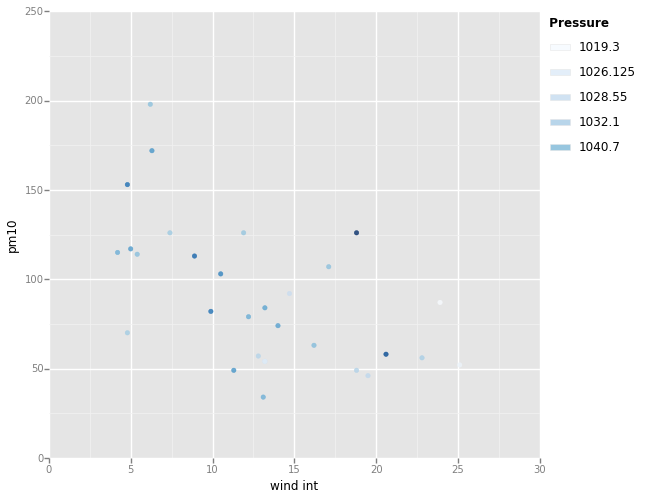

<ggplot: (281223245)>

In [141]:
ggplot(aes(x='wind int',y='pm10',color='pressure'),data=df)+geom_point(alpha=0.8)

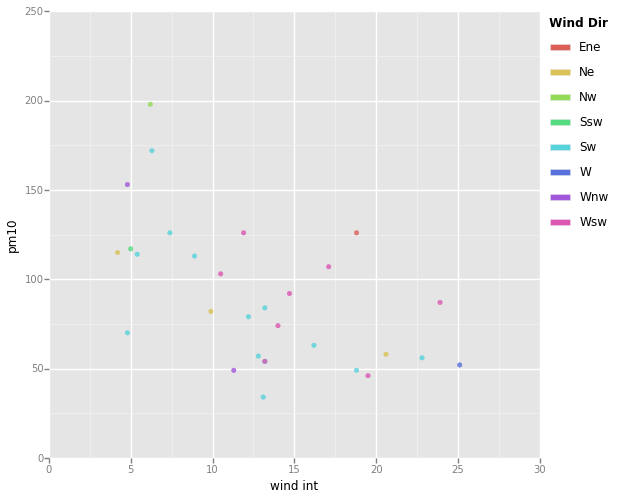

<ggplot: (278234917)>

In [67]:
ggplot(aes(x='wind int',y='pm10',color='wind dir'),data=df)+geom_point(alpha=0.8)

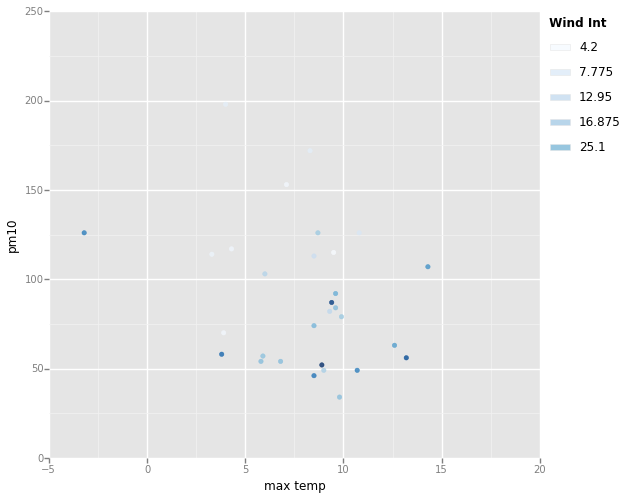

<ggplot: (278206317)>

In [75]:
ggplot(aes(x='max temp',y='pm10',color='wind int'),data=df)+geom_point(alpha=0.8)

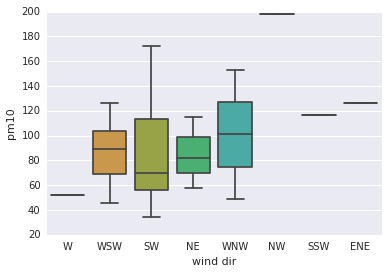

In [68]:
sns.boxplot(x='wind dir',y='pm10', data=df)

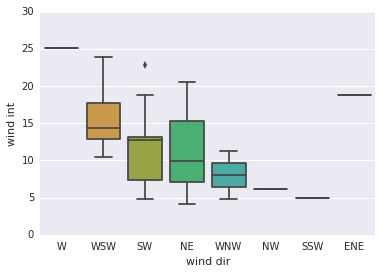

In [76]:
sns.boxplot(x='wind dir',y='wind int', data=df)

In [69]:
corls=list(an.correlate_ols_all(df[['pm10','pm2.5','wind int']]))
for c in corls:
    print c.summary()

                            OLS Regression Results                            
Dep. Variable:                   pm10   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     820.0
Date:                Tue, 12 Jan 2016   Prob (F-statistic):           2.78e-22
Time:                        09:02:07   Log-Likelihood:                -101.60
No. Observations:                  30   AIC:                             207.2
Df Residuals:                      28   BIC:                             210.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.8929      3.340      0.866      0.3

In [71]:
an.correlate_ols(df,('pm10','wind int','max temp')).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm10   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     6.876
Date:                Tue, 12 Jan 2016   Prob (F-statistic):            0.00386
Time:                        09:03:33   Log-Likelihood:                -146.59
No. Observations:                  30   AIC:                             299.2
Df Residuals:                      27   BIC:                             303.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        148.7450     18.671      7.967      0.000       110.435   187.055
wind int      -3.5285      1.070     -3.297      0.003        -5.724    -1.333
max temp      -1.6514      1.854     -0.891      0.381        -5.455     2.152
==============================================================================
Omnibus:                        0.918   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.782
Skew:                           0.370   Prob(JB):                        0.676
Kurtosis:                       2.723   Cond. No.                         49.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
an.correlate_ols(df,('pm2.5','pm10')).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pm2.5   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     820.0
Date:                Tue, 12 Jan 2016   Prob (F-statistic):           2.78e-22
Time:                        09:04:59   Log-Likelihood:                -91.393
No. Observations:                  30   AIC:                             186.8
Df Residuals:                      28   BIC:                             189.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0651      2.408      0.027      0.979        -4.867     4.997
pm10           0.6996      0.024     28.635      0.000         0.650     0.750
==============================================================================
Omnibus:                        0.041   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.214
Skew:                          -0.068   Prob(JB):                        0.899
Kurtosis:                       2.609   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#almost 70% of pm is actually fine one - 2.5

In [132]:
df2aleje[:2]

,day,no2,nox,no,co,co8,benz,pm10,pm2.5,next no2,next nox,next no,next co,next co8,next benz,next pm10,next pm2.5
0,2015-12-02,63,241,117,832,1295,-,52,40,42,107,42,408,769,-,21,14
1,2015-12-03,73,395,211,1368,2112,-,126,86,63,241,117,832,1295,-,52,40


In [135]:
df2aleje['next pm2.5']

0      14
1      40
2      86
3     111
4      53
5      63
6      54
7      77
8      56
9      63
10    111
11     38
12     43
13     55
14    147
15     78
16     79
17     43
18     61
19     79
20     54
21     25
22     30
23     79
24     92
25     26
26     40
27     43
28     34
29     44
Name: next pm2.5, dtype: int64